In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load the Breast Cancer dataset from scikit-learn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [5]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter 

In [7]:
# Understand the dataset distribution
print("\nDataset info:")
print(df.info())



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [9]:
# Check for class imbalance
print("\nTarget class distribution (0: Malignant, 1: Benign):")
print(df['target'].value_counts())



Target class distribution (0: Malignant, 1: Benign):
target
1    357
0    212
Name: count, dtype: int64


In [11]:
# 1. Data Preprocessing
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:

# 2. Model Selection
# Initialize models
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)


In [19]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [21]:
# Train and test Logistic Regression model
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)


In [23]:
# Train and test Random Forest model
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)


In [25]:
# Train and test Support Vector Machine model
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)


In [27]:
# 3. Model Evaluation
print("\nModel Evaluation:")



Model Evaluation:


In [31]:
# Logistic Regression
print("\nLogistic Regression Accuracy: {:.2f}%".format(log_acc * 100))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log))



Logistic Regression Accuracy: 98.25%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [33]:
# Random Forest
print("\nRandom Forest Accuracy: {:.2f}%".format(rf_acc * 100))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 95.61%
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
# Support Vector Machine
print("\nSupport Vector Machine Accuracy: {:.2f}%".format(svc_acc * 100))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svc))



Support Vector Machine Accuracy: 98.25%
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



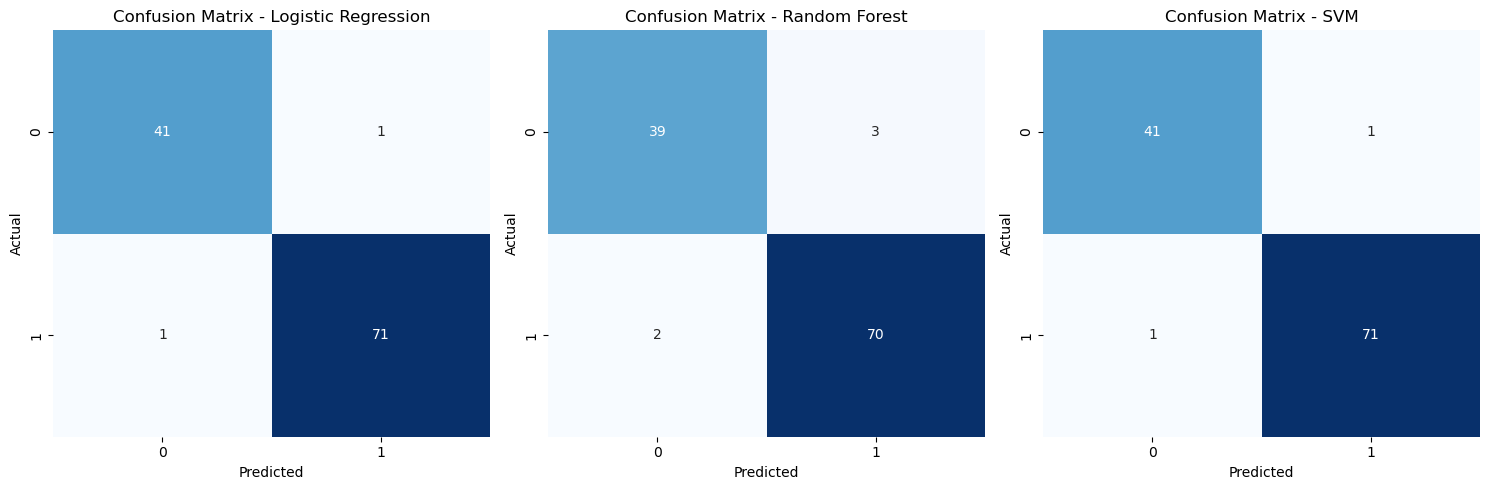

In [37]:
# Confusion Matrices for all models
models = ['Logistic Regression', 'Random Forest', 'SVM']
predictions = [y_pred_log, y_pred_rf, y_pred_svc]
plt.figure(figsize=(15, 5))
for i, pred in enumerate(predictions):
    plt.subplot(1, 3, i+1)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {models[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


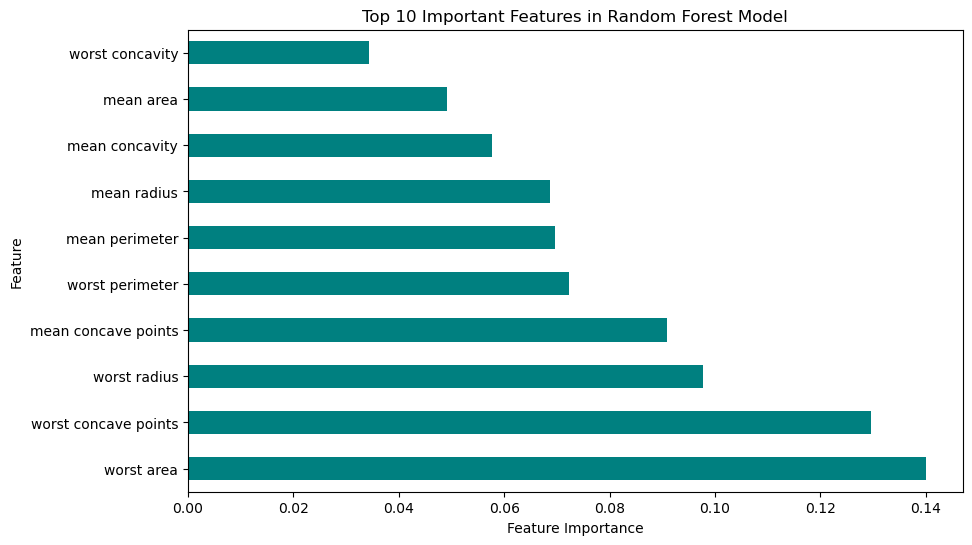

In [39]:
# 4. Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importances.nlargest(10).sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [41]:
# 5. Conclusion: Comparing Models
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [log_acc, rf_acc, svc_acc]
})

print("\nModel Performance Comparison:")
print(model_performance.sort_values(by='Accuracy', ascending=False))



Model Performance Comparison:
                 Model  Accuracy
0  Logistic Regression  0.982456
2                  SVM  0.982456
1        Random Forest  0.956140
